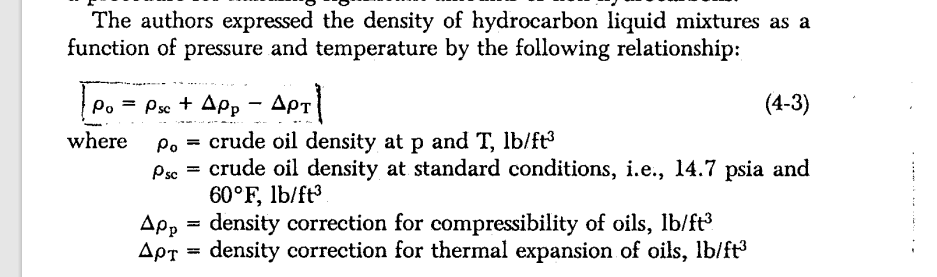

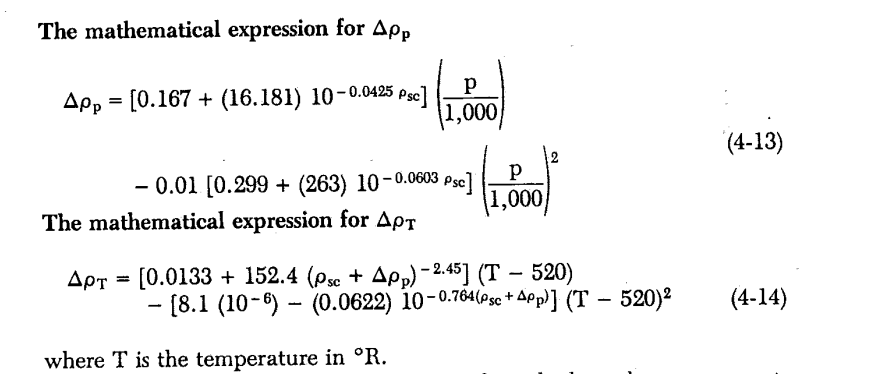


Referência: Ahmed, T., Hydrocarbon Phase Behauior, Gulf Publishing, Houston 
(1989).  Páginas 138 e 144


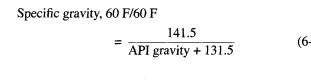

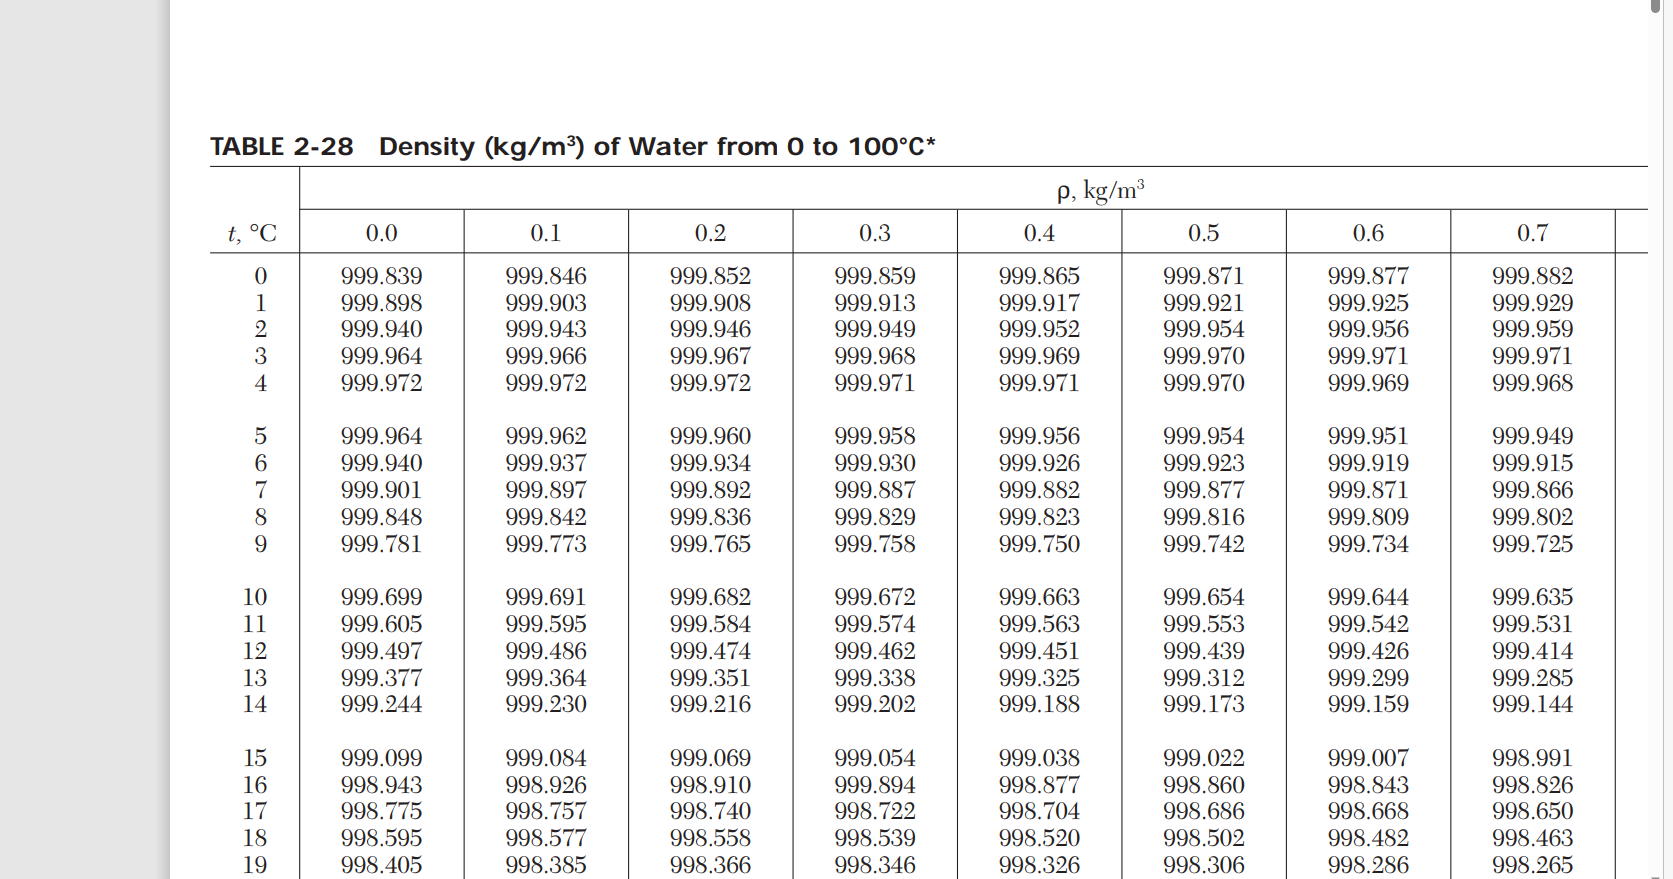

In [23]:
import numpy as np

In [1]:
def get_API(specific_gravity):

    '''Get the API gravity of oil.
    Parameters
    ----------
    specific_gravity: float

    Returns
    -------
    The API gravity of oil.
    API: float

    '''
    return 141.5/specific_gravity - 131.5


In [2]:
T = 370+273.15 #Temperature of operation in K.

P = 10*10**6 #Pressure in inlet in Pa.

ro0 = 914.6 #Density of oil at 15.6°C in g/cm^3.

roW = 999.007 #density of water at 15.6°C in g/cm^3.

Mm1 = 420 #molecuar wigth of the oil.

porosity = 0.5

dp = 0.172 #diameter of the pellet in cm

T_MeABP = (461 + 273.15)*1.8 # Mean average boiling point of oil in °R.

GL = 0.00572 # Mass flow in g/(cm^2*s).

w1 = 0.02 #weigth fraction of sulfur.

Vn = 8.3145*273.15/101325*1000 #Volume molar at standard conditions in Nl.

alfa1 = 7 #first coeficient of gas-liquid mass transfer in cm^(-1.6).

alfa2 = 0.4 #second coeficient of gas-liquid mass transfer

d15_6 = ro0/roW #Specific gravity of oil.

API = get_API(d15_6) #API gravity of oil.

vc1_m = 7.5214e-3*T_MeABP**0.2896*d15_6**(-0.7666) #critical specific volume in ft^3/lb.

vc_2 = 65.1 #critical specific volume of hydrogen in cm^3/mol.

vc_4 = 98.6 #critical specific volume of hydrogen sulfite in cm^3/mol.

vc1 = vc1_m*Mm1*62.42691047619048 #critical specific volume of the oil in cm^3/mol.

v1 = 0.285*vc1**1.048 #volume molar of the oil in cm^3/mol.

v2 = 0.285*vc_2**1.048   #volume molar of hydrogen in cm^3/mol.

v4 = 0.285*vc_4**1.048   #volume molar of hydrogen sulfite in cm^3/mol.


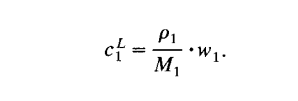

In [3]:
def deltaroP(ro0,P):

    '''Function to get the density of oil corretion with pressure.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in lb/ft^3.
        
        P: int or float
           Pressure in psia.

        Returns
        -------
        deltaroP: float
                  Density correction with pressure in lb/ft^3.

    '''

    return ((0.167 + (16.181*10**(-0.0425*ro0)))*(P/1000) - 0.01*(0.299 + (263*10**(-0.0603*ro0)))*(P/1000)**2)


In [4]:
def deltaroT(ro0, P, T):

    '''Function to get the density of oil corretion with temperature.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in lb/ft^3.
        
        P: int or float
           Pressure in psia.
    
        T: int or float
           Temperature in  °R.

        Returns
        -------
        deltaroT: float
                  Density correction with temperature in lb/ft^3.

    '''

    return ((0.0133 + 152.4*(ro0 + deltaroP(ro0,P))**(-2.45)))*(T-520) - (8.1*10**(-6) - 0.0622*10**((-0.764)*(ro0 + deltaroP(ro0,P))))*(T-520)**2

In [5]:
def oil_density(ro0,P,T):

    '''Get the density of oil in function of pressure and temperature.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        oil_density: float
                  Density correction with temperature in g/cm^3.

    '''    

    ro0 = ro0/16.018
    T = 1.8*T
    P = P*14.7/101325

    return ((ro0 + deltaroP(ro0,P) - deltaroT(ro0,P,T)))*0.016018

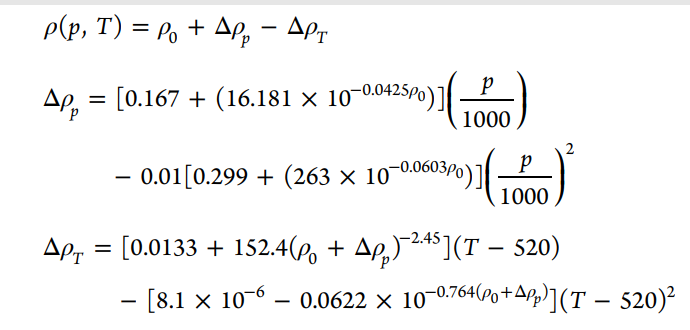

Para VGO:

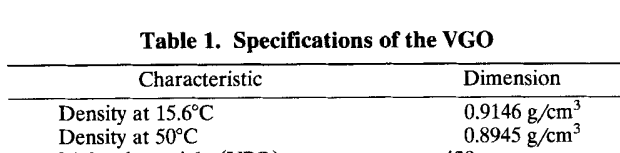


Referência: Korsten, H.; Hoffmann, U. Three-Phase Reactor Model for
Hydrotreating in Pilot Trickle-Bed Reactors. AIChE J. 1996, 42,
1350−1360.  Página 7

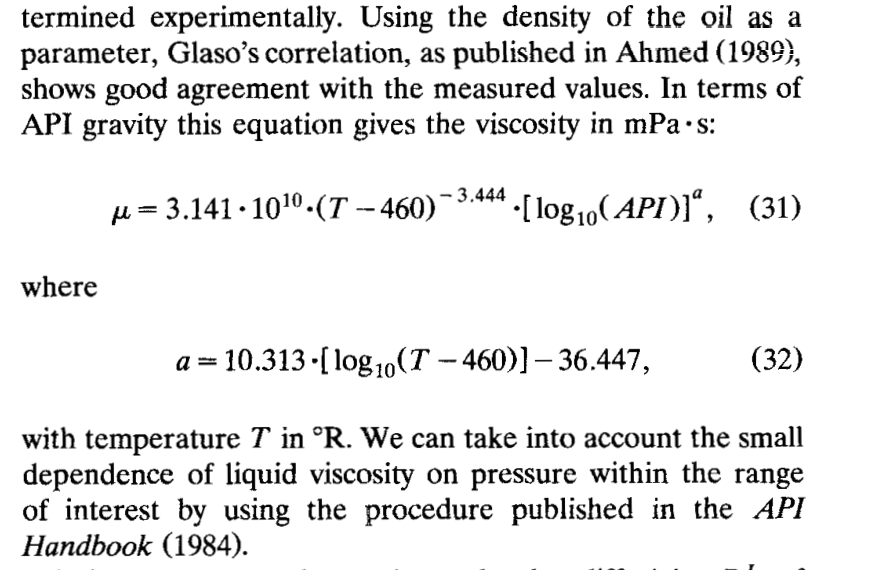

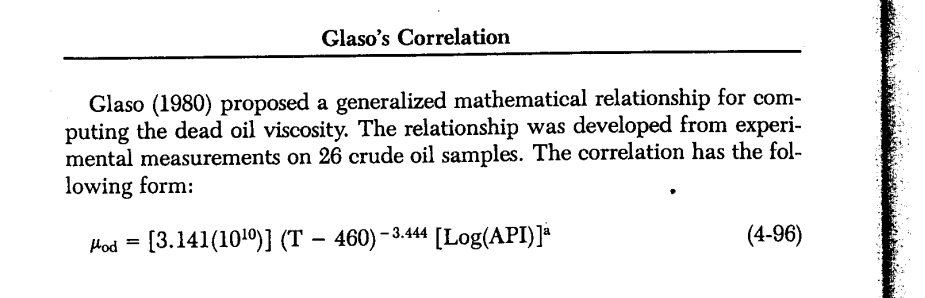


Páginas 208 e 209 do livro Ahmed

Por enquanto considerar API = 22° usado no artigo


Referência para o cálculo de API: API, Technical Data Book- Petroleum Refining, Amer. Pet. Inst. 
(1984).

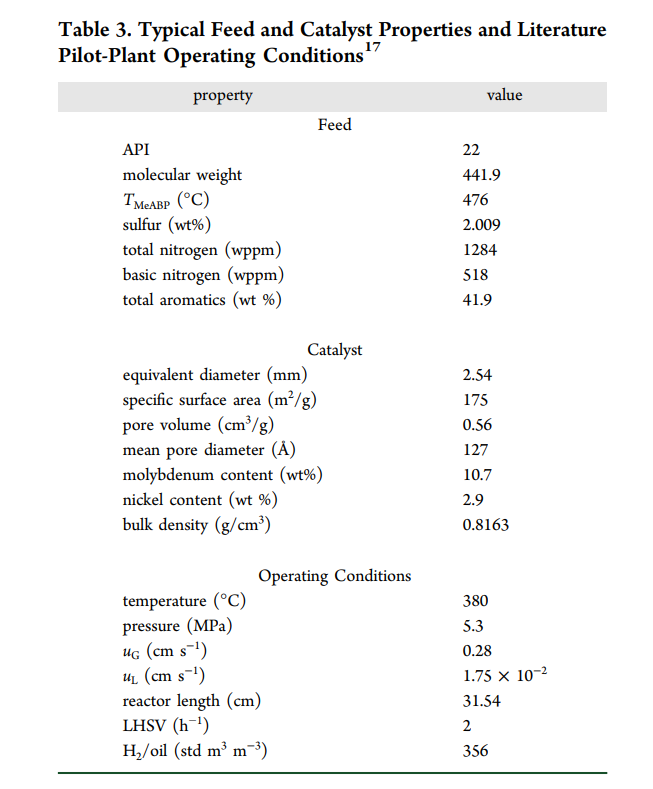

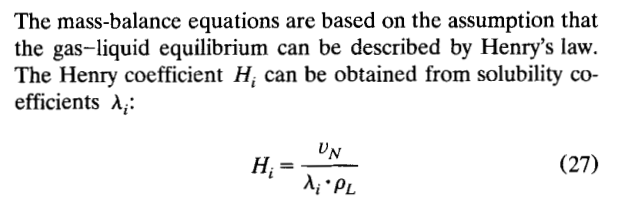

In [6]:
def ciL(w,ro0,P,T):
    
    '''Get the concentration of organic compound.
    
        Parameters
        ----------
        wi: The weight fraction of compound.

        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        ciL: float
             The concentration of organic compound in mol/cm^3.

    '''    
    return oil_density(ro0,P,T)*w/Mm1

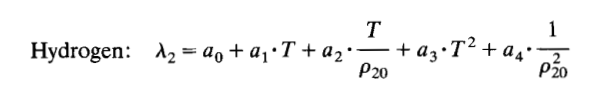

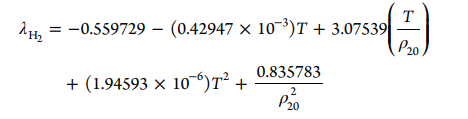

In [7]:
def Lambda2(T):

    '''Function to get the solubility of hydrogen in hydrocarbon mixtures.

    Parameters
    ----------
    T: int or float
       Temperature in K.

    Returns
    -------
    Lambda2: float
             Solubility of hydrogen in (Nl H2,)/[(kg oil)*(MPa)].
    '''
    T = T - 273.15

    ro_20 = oil_density(ro0,101325,293.15)

    return  -0.559729 - 0.42947e-3*T + 3.07539*T/ro_20 + 1.94593e-6*T**2 + 0.835783/ro_20**2    

In [8]:
def Henry_coefficient2(ro0,P,T):

    '''Function to get the Henry coefficient of hydrogen in hydrocarbon mixtures.
     
        ro0: int or float
            Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        H: float
           The Henry coefficient for hydrogen. '''  

    
    return Vn/(Lambda2(T)*oil_density(ro0,P,T)/1000)


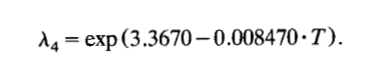

In [9]:
def Lambda4(T):

   '''Function to get the solubility of hydrogen sulfite in hidrocarbon mixtures.

    Parameters
    ----------
    T: int or float
       Temperature in °C.

    Returns
    -------
    Lambda2: float
             Solubility of hydrogen sulfite in (Nl H2S,)/[(kg oil)*(MPa)].
    '''
   T = T - 273.15

   return np.exp(3.3670 - 0.008470*T) 

In [10]:
def Henry_coefficient4(ro0,P,T):

    '''Function to get the Henry coefficient of hydrogen sulfite in hydrocarbon mixtures. 

        Parameters
        ----------

        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        H: float
           The Henry coefficient for hydrogen sulfite.
    '''  

    return Vn/(Lambda2(T)*oil_density(ro0,P,T)/1000)

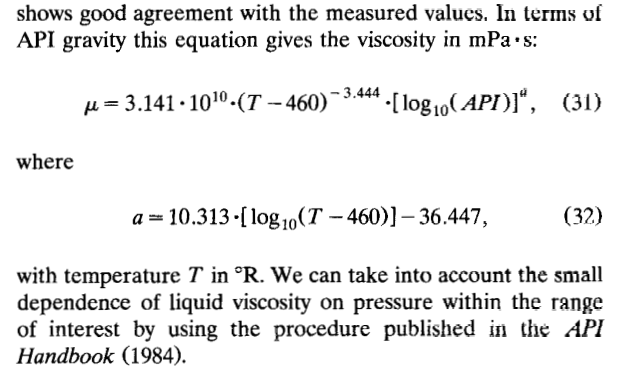

In [11]:
def mi_L(T,API=API):

    '''Function to get the viscosity of oil.

    Parameters
    ----------
    API: float or int
         API gravity of oil.   
    
    T: int or float
       Temperature in K.

    Returns
    -------
    mi_L: float
          Viscosity of oil sulfite in g/(cm*s).'''

    T = T*1.8

    a = 10.313*np.log10(T - 460) - 36.447

    return 3.141e10*(T - 460)**(-3.444)*((np.log10(API))**a)/100

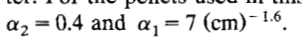

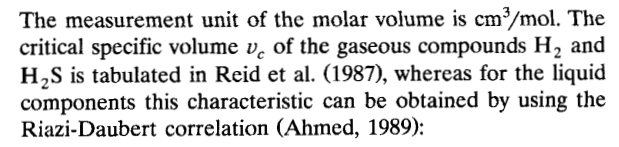

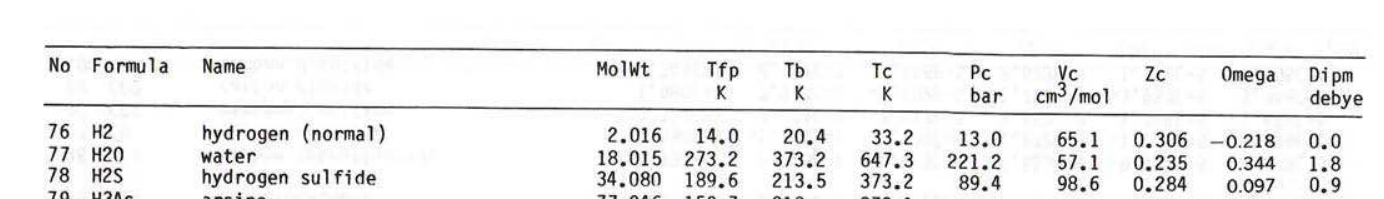

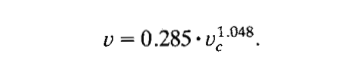

Vc do hidrogênio = 65,1cm3/mol  Volume crítico
Vc do sulfeto de hidrogênio = 98.6 cm3/mol

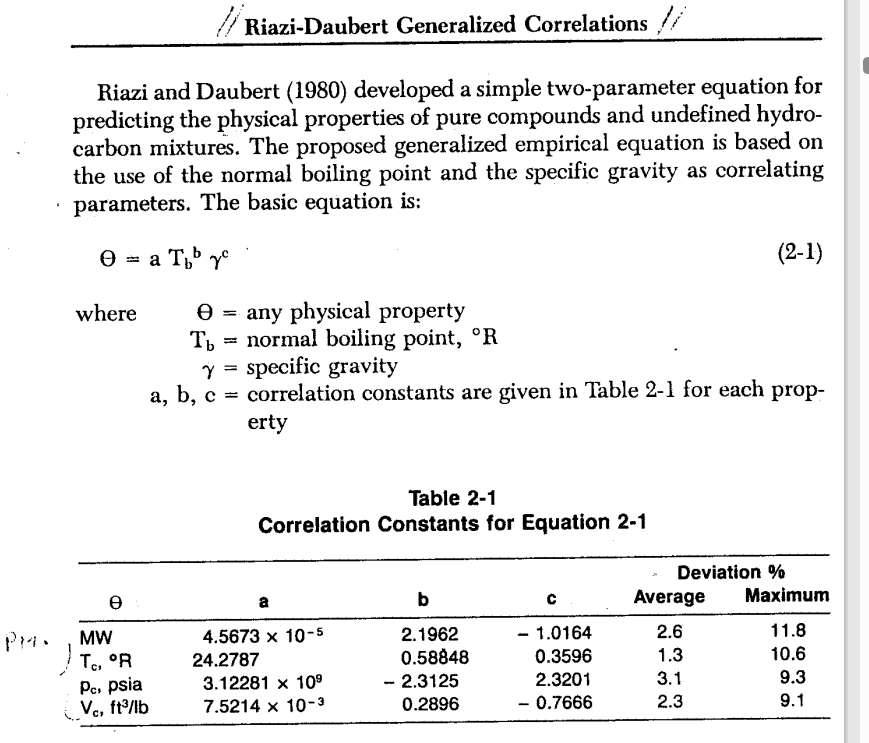

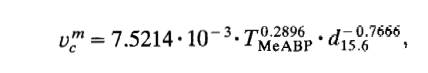

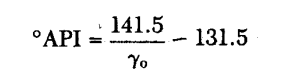

In [12]:
def specific_gravity(API):

    '''Get the specific gravity of oil.
    Parameters
    ----------
    API: int or float

    Returns
    -------
    The specific_gravity of oil.
    specific_gravity: float

    '''
    return 141.5/(API + 131.5)

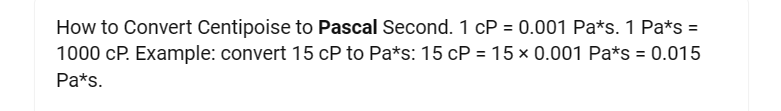

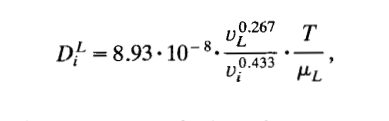

In [13]:
def D2_L(T):

    '''Gets the coefficient of diffusivity of hydrogen in solution in cm^2/s.

    Parameters
    ----------
    T: int or float
       Temperature in K.
    
    Returns
    -------
    D2_L: float
          The difusivity coefficient.
    '''

    return (8.93e-8*(v1**0.267)*T)/((v2**0.433)*(mi_L(T)*100))

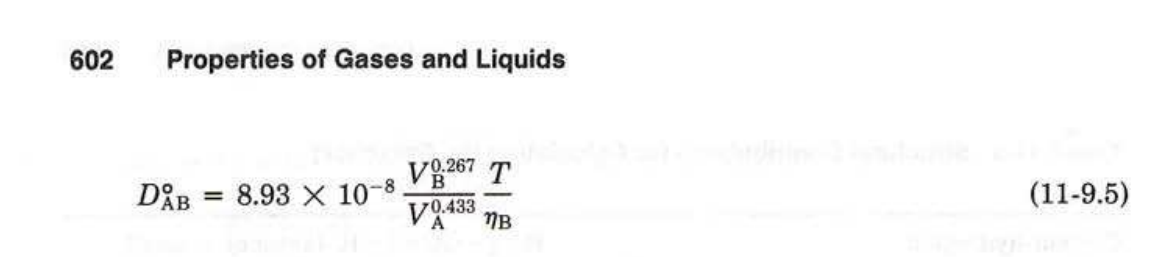

In [14]:
def D4_L(T):

    '''Gets the coefficient of diffusivity of hydrogen sulfite in solution in cm^2/s.

    Parameters
    ----------
    T: int or float
       Temperature in K.
    
    Returns
    -------
    D2_L: float
          The difusivity coefficient.
    '''

    return 8.93e-8*v1**0.267*T/v4**0.433/(mi_L(T)*100)

In [15]:
def D1_L(T):

    '''Gets the coefficient of diffusivity of the organic sulfur compound in solution in cm^2/s.

    Parameters
    ----------
    T: int or float
       Temperature in K.
    
    Returns
    -------
    D1_L: float
          The difusivity coefficient.
    '''

    return (8.93e-8*(v1**0.267)*T)/((v1**0.433)*(mi_L(T)*100))

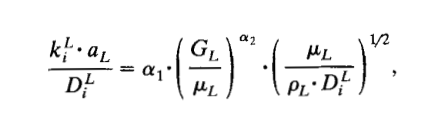

In [16]:
#the gas-liquid transfer mass

def k2Lat(ro0,P,T): 
    
   '''Get the gas-liquid mass transfer coefficient from liquid to particle for hydrogen.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        k2Lat: float
             Mass transfer coefficient in s^-1.'''
   
     
   return D2_L(T)*alfa1*(GL/mi_L(T))**alfa2*(mi_L(T)/(oil_density(ro0,P,T)*D2_L(T)))**(0.5)



In [17]:
def k4Lat(ro0,P,T): 
    
   '''Get the gas-liquid mass transfer coefficient from liquid to particle for hydrogen sulfite.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        k4Lat: float
             Mass transfer coefficient in s^-1.'''
   
     
   return D4_L(T)*alfa1*(GL/mi_L(T))**alfa2*(mi_L(T)/(oil_density(ro0,P,T)*D4_L(T)))**(0.5)

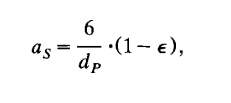

In [18]:
def a_t(dp=0.172,porosity = 0.5):

    '''Gets the specific surface area of the packing.

        Parameters
        ----------
        dp: int or float
            Diameter of the pellet in cm.

        porosity: int or float
                  The void fraction of the catalystic bed.

        Return
        ------
        a_super: float
                 The specific surface area of the packing in cm^-1.
    '''

    return 6*(1-porosity)/dp
    


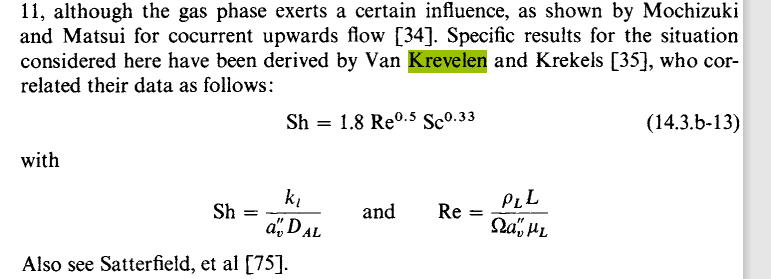

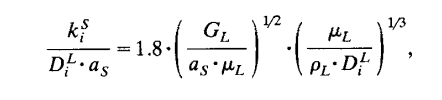

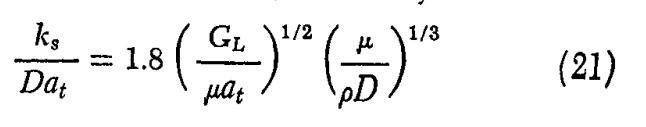

In [19]:
def k2sat(ro0,P,T):

    '''Get the mass transfer coefficient from liquid to particle for hydrogen.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        k2sat: float
             Mass transfer coefficient from liquid to particle in s^-1.'''

    return D2_L(T)*a_t()**2*1.8*(GL/(mi_L(T)*a_t()))**0.5*(mi_L(T)/(oil_density(ro0,P,T)*D2_L(T)))**(1/3)

In [20]:
def k1sat(ro0,P,T):

    '''Get the mass transfer coefficient from liquid to particle for organic sulfur compound.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        k1sat: float
             Mass transfer coefficient from liquid to particle in s^-1.'''

    return D1_L(T)*a_t()**2*1.8*(GL/(mi_L(T)*a_t()))**0.5*(mi_L(T)/(oil_density(ro0,P,T)*D1_L(T)))**(1/3)

In [21]:
def k4sat(ro0,P,T):

    '''Get the mass transfer coefficient from liquid to particle for hydrogen sulfite.
    
        Parameters
        ----------
        ro0: int or float
             Density at standard conditions (15,6°C; 101.3 kPa) in g/cm^3.
        
        P: int or float
           Pressure in Pa.
    
        T: int or float
           Temperature in K.

        Returns
        -------
        k4sat: float
             Mass transfer coefficient from liquid to particle in s^-1.'''

    return D4_L(T)*a_t()**2*1.8*(GL/(mi_L(T)*a_t()))**0.5*(mi_L(T)/(oil_density(ro0,P,T)*D4_L(T)))**(1/3)